In [1]:
import random
import pandas as pd
import numpy as np
import scikitplot as skplt 
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('MIT-BIH Arrhythmia Database.csv')
data

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,101,N,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41,...,0.025930,2,18,22,2,0.025930,0.025930,0.025930,0.025436,0.025436
1,101,N,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21,...,-0.042009,26,27,62,9,-0.042009,-0.029498,0.005012,0.030892,0.002986
2,101,N,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22,...,0.009528,3,8,12,1,0.009528,0.009528,0.008786,0.008786,0.008368
3,101,N,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22,...,-0.020536,6,9,16,1,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555
4,101,N,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11,...,0.016053,16,5,31,10,0.016053,0.006742,0.002782,-0.007798,-0.051155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100684,234,N,240,241.0,-0.110230,1.420339,1.403346,1.403346,-0.115682,14,...,-0.069234,5,6,20,9,-0.069234,-0.068378,-0.065373,-0.060779,-0.054383
100685,234,N,241,243.0,-0.119014,1.424782,1.420328,1.420328,-0.134406,13,...,-0.069530,7,5,20,8,-0.069530,-0.069290,-0.066317,-0.053437,-0.045120
100686,234,N,243,252.0,0.173524,-0.443214,1.436878,-0.714642,-0.136431,38,...,-0.089396,9,7,24,8,-0.089396,-0.088155,-0.078611,-0.066763,-0.058650
100687,234,N,252,244.0,-0.119820,-0.401522,1.337051,-0.688560,-0.125076,27,...,-0.065487,3,1,12,8,-0.065487,-0.065487,-0.064941,-0.064941,-0.061120


In [3]:
df1=data.copy()

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for i in df1.columns:
    df1[i]=le.fit_transform(df1[i])
df1

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,1,1,52,286,67739,30008,46426,62503,70569,41,...,96588,2,17,17,1,96588,89530,77319,74617,83411
1,1,1,289,288,26014,24177,35191,60052,55134,21,...,70406,26,26,57,8,70406,71229,73413,74974,81928
2,1,1,291,294,22705,22275,43744,57543,52242,22,...,94085,3,7,7,0,94085,84378,74095,73325,82295
3,1,1,297,309,22270,23117,46343,57996,49245,22,...,79328,6,8,11,0,79328,74194,70019,70517,80324
4,1,1,312,317,22418,79964,47024,81931,47855,11,...,95464,16,4,26,9,95464,83375,73063,71580,75765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100684,43,1,216,214,8025,89070,73998,89791,30524,14,...,62128,5,5,15,8,62128,60661,63033,64950,75245
100685,43,1,217,216,6095,89162,75251,90160,24887,13,...,62022,7,4,15,7,62022,60393,62856,65968,76666
100686,43,1,219,225,85439,12517,76351,32322,24409,38,...,55739,9,6,19,7,55739,55244,60600,64085,74532
100687,43,1,228,217,5931,15404,68784,35345,27462,27,...,63350,3,0,7,7,63350,61531,63130,64392,74093


In [4]:
X = df1.drop(['type'],axis=1)
y = df1[['type']]

print(X.shape, y.shape)

d=X.shape[1]
h= y.shape[0]
print("initial feature number:",d)

(100689, 33) (100689, 1)
initial feature number: 33


type
N       90083
VEB      7009
SVEB     2779
F         803
Q          15
Name: count, dtype: int64 



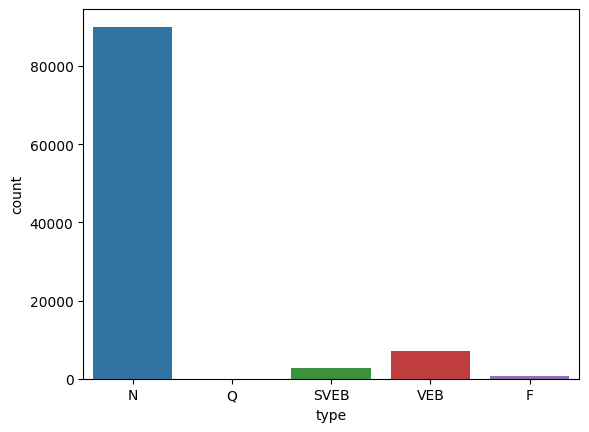

In [5]:
import seaborn as sns
figsize=(6,5)
print(data['type'].value_counts(),"\n")
sns.countplot(x=data['type'])
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.25, random_state= 42) # ,random_state=42
                                                    
    
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

type
1    67562
4    67562
3    67562
0    67562
2    67562
Name: count, dtype: int64


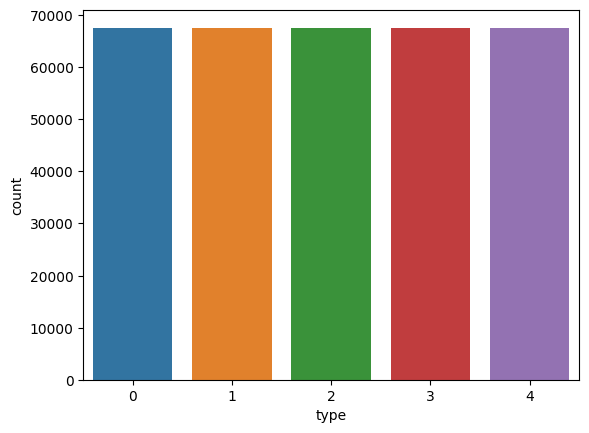

In [8]:
from imblearn.over_sampling import SMOTE
# Instantiate SMOTE
smote = SMOTE()

# Apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
print(y_resampled['type'].value_counts())

# Plot the balanced class distribution
sns.countplot(x=y_resampled['type'])
plt.show()

In [11]:
X_resampled.shape, y_resampled.shape


((337810, 33), (337810, 1))

In [13]:
# Apply k-fold cross-validation
k = 10  # Number of folds
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
accuracies = []

# Initialize empty lists to collect predictions and true labels
all_y_pred = []
all_y_true = []

for train_index, test_index in skf.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled[train_index], X_resampled[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]
     

    # Faster Method
    m = d * 17
    X_train_copy = deepcopy(X_train)
    X_test_copy = deepcopy(X_test)

    new_dataset_train = {}
    new_dataset_test = {}

    # m is the number of new features to generate
    for i in range(m):
        # randomly select two features
        selected_cols = np.random.choice(X_train_copy.shape[1], size=2, replace=False)
        # randomly select an operator
        op = np.random.choice(["+", "-", "*"])

        if op == "+":
            new_col_train = X_train_copy[:, selected_cols[0]] + X_train_copy[:, selected_cols[1]]
            new_col_test = X_test_copy[:, selected_cols[0]] + X_test_copy[:, selected_cols[1]]
        elif op == "-":
            new_col_train = X_train_copy[:, selected_cols[0]] - X_train_copy[:, selected_cols[1]]
            new_col_test = X_test_copy[:, selected_cols[0]] - X_test_copy[:, selected_cols[1]]
        elif op == "*":
            new_col_train = X_train_copy[:, selected_cols[0]] * X_train_copy[:, selected_cols[1]]
            new_col_test = X_test_copy[:, selected_cols[0]] * X_test_copy[:, selected_cols[1]]

        # add the new column to the dataset
        X_train_copy = np.hstack((X_train_copy, new_col_train.reshape(-1, 1)))
        X_test_copy = np.hstack((X_test_copy, new_col_test.reshape(-1, 1)))

        # add the new column to the dictionary
        new_dataset_train[i] = list(new_col_train)
        new_dataset_test[i] = list(new_col_test)

    # convert the dictionary to a DataFrame and then to a numpy array
    df_train = pd.DataFrame(new_dataset_train)
    df_test = pd.DataFrame(new_dataset_test)
    X_train_new4 = df_train.values
    X_test_new4 = df_test.values

    # Train and evaluate a model
    clf = RandomForestClassifier()
    clf.fit(X_train_new4, y_train)
    y_hat = clf.predict(X_test_new4)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_hat)
    print("Accuracy is", accuracy * 100)
    accuracies.append(accuracy)
    
    # Collect predictions and true labels
    all_y_pred.extend(y_hat)
    all_y_true.extend(y_test.values.ravel())

# Calculate the average accuracy
average_accuracy = np.mean(accuracies)
print("Average accuracy:", average_accuracy)


# Convert lists to arrays
all_y_pred = np.array(all_y_pred)
all_y_true = np.array(all_y_true)

# Print final classification report and confusion matrix
print("Classification Report:")
print(classification_report(all_y_true, all_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(all_y_true, all_y_pred))

C:\Users\momin\AppData\Local\Temp\ipykernel_7276\3858713476.py:58: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_new4, y_train)


Accuracy is 99.83422634025044


C:\Users\momin\AppData\Local\Temp\ipykernel_7276\3858713476.py:58: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_new4, y_train)


Accuracy is 99.87862999911192


C:\Users\momin\AppData\Local\Temp\ipykernel_7276\3858713476.py:58: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_new4, y_train)


Accuracy is 99.80758414493354


C:\Users\momin\AppData\Local\Temp\ipykernel_7276\3858713476.py:58: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_new4, y_train)


Accuracy is 99.81942512062994


C:\Users\momin\AppData\Local\Temp\ipykernel_7276\3858713476.py:58: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_new4, y_train)


Accuracy is 99.87270951126372


C:\Users\momin\AppData\Local\Temp\ipykernel_7276\3858713476.py:58: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_new4, y_train)


Accuracy is 99.78390219354075


C:\Users\momin\AppData\Local\Temp\ipykernel_7276\3858713476.py:58: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_new4, y_train)


Accuracy is 99.84310707202273


C:\Users\momin\AppData\Local\Temp\ipykernel_7276\3858713476.py:58: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_new4, y_train)


Accuracy is 99.84014682809863


C:\Users\momin\AppData\Local\Temp\ipykernel_7276\3858713476.py:58: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_new4, y_train)


Accuracy is 99.80166365708534


C:\Users\momin\AppData\Local\Temp\ipykernel_7276\3858713476.py:58: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_new4, y_train)


Accuracy is 99.85790829164323
Average accuracy: 0.9983393031585802
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67562
           1       1.00      0.99      1.00     67562
           2       1.00      1.00      1.00     67562
           3       1.00      1.00      1.00     67562
           4       1.00      1.00      1.00     67562

    accuracy                           1.00    337810
   macro avg       1.00      1.00      1.00    337810
weighted avg       1.00      1.00      1.00    337810

Confusion Matrix:
[[67557     5     0     0     0]
 [   26 67149     3   158   226]
 [    0     0 67562     0     0]
 [    0    44     0 67508    10]
 [   37    52     0     0 67473]]


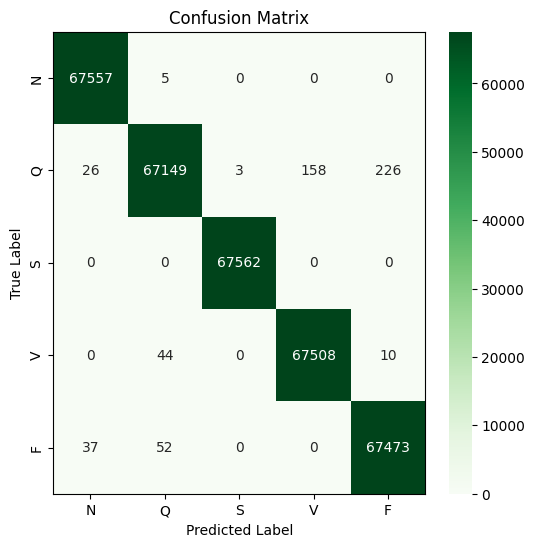

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the final confusion matrix
cm = confusion_matrix(all_y_true, all_y_pred)

# Define class labels
labels = ['N', 'Q', 'S', 'V', 'F']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d', xticklabels=labels, yticklabels=labels)

# Add labels, title, and axis ticks
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=np.arange(len(labels)) + 0.5, labels=labels)
plt.yticks(ticks=np.arange(len(labels)) + 0.5, labels=labels)

# Add an outline or border to the plot
plt.gca().set_facecolor('lightgray')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['right'].set_visible(True)

# Display the plot
plt.show()